<h2> Keras Tutorial Project(Team 15) : Harsha Sai Teja Gannamani, Venkata Sai Nikhil Meda, Yashwanth Bandala

In [201]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.utils import np_utils
from keras.layers import Convolution2D, MaxPooling2D, Dropout
import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.decomposition import PCA
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from scipy.stats import multivariate_normal as mvn
import warnings
from keras.optimizers import SGD
warnings.filterwarnings('ignore')


<h2>Question 1<h2>

 1) Loading data
Choose a data set that fits a regression or classification problem. Describe those data and show how to load those data so that they can be used in keras. Show how to create cross-validation folds, etc., so that you can test your algorithm properly.

We have choosen Fashion_MNIST dataset which fits for the classification problem.

<h5>Importing the Fashion_MNIST Data Set</h5>

Fashion_MNIST Data set contains 70,000 grey scale images of 10 categories clothing as (28x28) pixel images. Here we use 60000 images as Training Data and rest 10000 as Testing Data. This Data Set is available in Keras. So, we can use it from the Keras.

In [202]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

<h5>Exploring the Data Set<h5>

plotting the images of the 10 different categorical variables

In [203]:
seri=pd.Series(y_train)
k=[]
for i in range(10):
    k.append(seri[seri == i].index[0])
Labels=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
df=pd.DataFrame(Labels,columns=['Different Categorical Variables'])
df
   
    

,Different Categorical Variables
0,T-shirt/top
1,Trouser
2,Pullover
3,Dress
4,Coat
5,Sandal
6,Shirt
7,Sneaker
8,Bag
9,Ankle boot


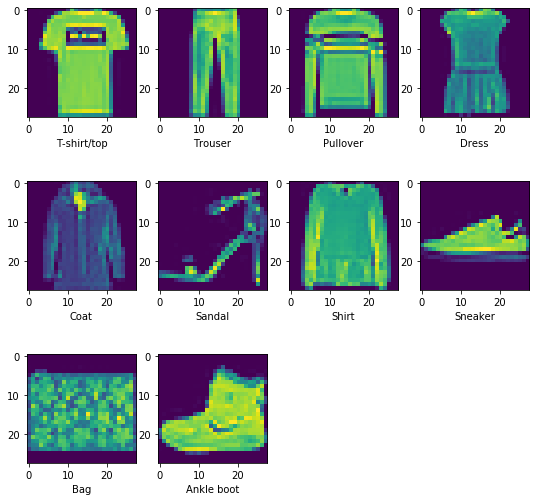

In [204]:
plt.figure(figsize=(9,9))
j=0
for i in k:
    plt.subplot(3,4, j+1)
    plt.imshow(x_train[i]) 
    #plt.colorbar()
    plt.grid(False)
    plt.xlabel(Labels[j])
    j=j+1
plt.show() 

<h5>Preprocessing the Data<h5>

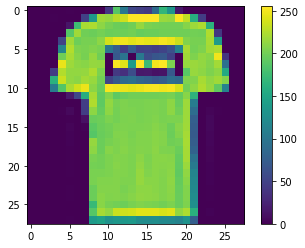

In [205]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)
plt.show()

From the above figure we can see that the pixel values are ranging from 0 to 255, Inorder to pass them to the neural network we need to scalae them down to range 0 to 1, So we are dividing the training data and testing data with 255.

In [206]:
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255
X_test /= 255

we should have 10 different classes, one for each digit, but we have only have an 1-dimensional array. so we need to Convert 1-dimensional class arrays to 10-dimensional class matrices before passing them to the model

In [207]:
#preprocessing Training and testing labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

<h5>Flatenning our data of(28x28) 2D array into 1D array of 784 pixels to send it through the model<h5>

In [208]:
nsamples, nx, ny = X_train.shape
Xtrain = X_train.reshape((nsamples,nx*ny))
nsamples1, nx1, ny1 = X_test.shape
Xtest= X_test.reshape((nsamples1,nx1*ny1))

<h5>Cross validation</h5>

Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set.There are Different types of cross validation in machine learning among them the popular ones are k-fold cross validation,leaveoneout cross validation and Holdout method cross validation
<li> We are using k-fold cross validation in this project because of it's reduced bias and reduced computational time when compared to other cross validations.
<li> In this k-fold cross validation we divide the entire data set into k-folds and then train our model using k-1 folds and then we test our model on the kth fold.   

In [209]:
%%html
<img src="Capture1.jpeg",width=500,height=100>

In [210]:
#K fold cross validation function function
"""
Here Xtrain is the flattened (1D)training data with out labels and y_train is the label data and folds are number of folds
It retuns a list of accuracies and losses for each fold
"""
def Kfold(Xtrain,y_train,folds,opt):
    accuracy=[]
    accuracy1=[]
    loss1=[]
    frame=[]
    ren=Xtrain
    dfre=pd.DataFrame(ren)#converting our (1D) numpy array into data frame
    dfre['op']=y_train # adding our labels into the data frame
    df = dfre.sample(frac=1) 
    """
    rearranging the rows in our data frame such that when we split the dataframe in to k folds 
    we have all the class labels distributed equally among all folds
    
    """
    df_split = np.array_split(df, folds)#Splitting our data frame into k folds
    for i in range(len(df_split)):
        frame.append(df_split[i])#Adding all our splitted k fold data frames into a list
    for i in range(folds):
        fram=[]
        fram=frame.copy()
        fram.pop(i)
        """
        here in fram list we have all the data frames appended.so for example when i value is 1 we are popping the 
        ith(i.e 1st) positioned data frame from the list and the concatenate all the other dataframes in the list. Here
        the ith(ie 1st) positoned data frame is the (k)testing fold and the rest of the data frames contains (k-1)folds
        training data.
        """
        print("For Fold {0}".format(i))
        print('-------------------------------')
        train = pd.concat(fram)
        test = frame[i]
        trainY=train.iloc[:,-1]# removing the training data labels from the training data(dataframe) and setting them as training labels
        testY=test.iloc[:,-1]# removing the testing data labels from the training data(dataframe) and setting them as training labels
        trainX=train.iloc[:, :-1]#removing labels from the training data
        testX=test.iloc[:, :-1]# removing labels from the testing data
        X_train = trainX.astype('float32')
        X_test = testX.astype('float32')
        """
        Here we are converting the labels of training and testing data set into a  binary matrix representation.
        The classes axis is placed last. As the number of different class labels are 10 we are passing the value of 10
        """
        Y_train = np_utils.to_categorical(trainY, 10)
        Y_test = np_utils.to_categorical(testY, 10)
        """
        Then we will pass our training and testing data. In model we will define dense layers of perceptrons and then fit
        our training data to the model and the predict accuracy and loss on the testing data.
        """
        accuracy,loss,pred=modeln(X_train,Y_train,X_test,Y_test,opt)
        print('-------------------------------')
        print("Accuracy for the Fold {0} is {1}".format(i,accuracy))
        print("Loss for the Fold {0} is {1}".format(i,loss))
        print('-------------------------------')
        accuracy1.append(accuracy)
        loss1.append(loss)
    return accuracy1,loss1    

<h2>Question 2<h2>

2) Creating a keras model (a simple network)
Develop a keras model that can perform the classification or regression for the data set you chose. I recommend using simple Dense layers so that it trains quickly. Describe this model and show an illustration (figure) of it in your notebook.

<h5>Importing all the required libraries from the keras</h5>

In [211]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.utils import np_utils

<h5> model = sequential() </h5>
Models in Keras are defined as a sequence of layers. The Sequential model is a linear stack of layers. Sequential specifies to keras that we are creating model sequentially and the output of each layer we add is input to the next layer we specify. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs. the layers can be defined and passed to the Sequential as an array. The Sequential model API is great for developing deep learning models in most situations. In Keras, we assemble layers to build models. A model is (usually) a graph of layers. The most common type of model is a stack of layers that is Sequential model.


<h5> model.add(Dense(250, input_shape=(784,), activation='relu')) </h5>
For Dense layers, the first parameter is the output size of the layer. Keras automatically handles the connections between layers. model.add is used to add a layer to our neural network. We need to specify as an argument what type of layer we want. The Dense is used to specify the fully connected layer. For this layer we have the input of 784 pixels(1D array).This layer contains 250 units (perceptrons). We are using the RELU activation function in this layer   

<h5> model.add(Dense(100, activation='relu')) </h5>
For Dense layers, the first parameter is the output size of the layer. Keras automatically handles the connections between layers. model.add is used to add a layer to our neural network. We need to specify as an argument what type of layer we want. The Dense is used to specify the fully connected layer.  For this layer we have the 250 inputs from the 250 units of the previous layer.This layer contains 250 units (perceptrons). We are using the RELU activation function in this layer
<h5> model.add(Dense(10, activation='softmax')) </h5>
The final layer has an output size of 10, corresponding to the 10 classes of digits. In our dataset, output is of 10 values. The output layer uses softmax activation function.For this layer we have the 100 inputs from the 100 units of the previous layer.

In [212]:
def ourmodel():
    model = Sequential()
    model.add(Dense(250, input_shape=(784,), activation='relu'))
    model.add(Dense(100, activation="relu"))
    model.add(Dense(10, activation='softmax'))
    return model

<h5>Activation Function<h5>

If a neuron doesnot have an Activation function then it's output is just the linear transformation of inputs and weights.Then the network is acts a linear regression model which can only predict the linear relationship between the variables. So we use the activation function to introduce the non-linearity in the network. Some of the popular Activation functions used for classification problems are
<li>Logistic
<li>tanh(hyperbolic Tangent)
<li>Relu(Rectified Linear Unit)
<li>Leaky Relu
<li>Softmax    

<h6>Why Relu?</h6>

Relu(Rectified Linear Unit) is the most commonly used function because of it's simplicity and less computational time. Relu should always be used in the hidden layers because,they can have very large outputs so they might be expected to be far more likely to explode than units that have bounded values. Relu is treated as the standard activation function in the CNN(Convolutional Neural Network).

For classification problem,we can use Sigmoid functions(Logistic, tanh, Softmax). But at this time we prefer using Relu because, sigmoid functions which are non-linear functions may suffer from vanishing gradient problem.A problem with training networks with many layers is that the gradient diminishes dramatically as it is propagated backward through the network. The error may be so small by the time it reaches layers close to the input of the model that it may have very little effect. As such, this problem is referred to as the “vanishing gradients” problem.

<b>Function of Relu:</b> y=max(0,x)
<li> Here X is the input,If the value of x is positive then the function returns x.
<li> If the input value is negative or equal to zero then the function returns 0.  

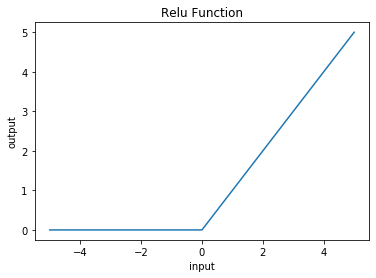

In [213]:
x=[-5,-4,-3,-2,-1,0,1,2,3,4,5]
y=[]
for i in x:
    y.append(max(0,i))
plt.plot(x, y, '-')
plt.title('Relu Function')
plt.xlabel('input')
plt.ylabel('output')
plt.show()    

<h5>why to use the soft max activation function in the last neural network</h5>

In a classification problem, the output will be the probability distribution containing different classes probability values. If we are considering a binary classification problem then we can use the logistic activation function, since we are considering the Multi-class classification problem logistic activation doesnot work well so we use softmax for multiclass classification problems. For example if we consider one of the output value to be negative then when we we calculate the probability of a class we will get the negative value, which is not acceptable. But in softmax even if the output value of a class is negative it returns positive value as e^x will always return positive values

<b>Function of softmax</b>

In [214]:
%%html
<img src="softmax.jpg",width=500,height=100>

<h5> model.summary() </h5>
model.summary() prints a summary representation of the model. For layers with multiple outputs, multiple is displayed instead of each individual output shape due to size limitations

In [215]:
model=ourmodel()
model.summary()

Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_238 (Dense)            (None, 250)               196250    
_________________________________________________________________
dense_239 (Dense)            (None, 100)               25100     
_________________________________________________________________
dense_240 (Dense)            (None, 10)                1010      
Total params: 222,360
Trainable params: 222,360
Non-trainable params: 0
_________________________________________________________________


Our model summary states that we have 3 dense layers having 250 units in the first layer, 100 in the second layer and 10 units in the last layers.
<br><b>Hidden layer1</b>
<li> number of paramenters in the 1st layer are (250x785), here 785 are the input pixels +bias and 250 are the units present in the layer.
<br><b>Hidden layer2</b>
<li> number of paramenters in the 2nd layer are (100x251), here 251 are the number of outputs from the previous layer (i.e 250) + bias and 100 are the number of units in the layer.
<br><b>Output layer</b>
<li> number of paramenters in the output layer are (10x101), here 101 are the number of outputs from the previous layer (i.e 100) + bias and 10 are the number of units in the layer      
Total number of parameters in our neural network is 222,360 among them all are trainable parameters.    

<h5>Our Model Architecture</h5>

In [216]:
%%html
<img src="model.jpeg",width=500,height=100>

In [217]:
%%html
<img src="model flow.jpeg",width=500,height=100>

Our Model architecture contains 2 hidden layers and an output layer:
<li> 1st hidden layer has 250 units(perceptrons) and uses RELU activation function
<li> 2nd hidden layer has 100 units(perceptrons) and uses RELU activation function
<li> output layer has 10 units(perceptrons) and uses Softmax activation function       

<h2>Question 3</h2>

3) Compiling the model
<li>Show how to compile the keras model, choosing the loss function, optimizer, etc. Describe the choices you made and why. Describe what other choices could be made here.

In [218]:
model=ourmodel()
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In our model.compile 
<li>we used loss function of categorical_crossentropy
<li>we used optimizer as Adam(Adaptive Moment Estimation)   

In [219]:
"""
Function modeln takes X_train,X_test(preprocessed testing and training data) and Y_Train,Y_test(preprocessed testing and 
training data mentioned in the 1st question)

This function is used in the KFOLD function defined in the 1st question
"""
def modeln(X_train,Y_train,X_test,Y_test,opt):
    model = ourmodel()#model is defined in the second question
    model.compile(loss="categorical_crossentropy",optimizer=opt,metrics=['accuracy'])#compliling the model
    model.fit(X_train, Y_train, batch_size=128,nb_epoch=10)#fitting the model
    score = model.evaluate(X_test, Y_test)#evaluating the model
    score1 = model.predict(Xtest)
    pred=[]
    for i in range(len(score1)):
        pred.append(np.argmax(score1[i]))
    return score[1],score[0],pred
"""
Here score[1] is the accuracy of the testing data and score[0] is the loss of the testing data
pred contains the list of predicted outputs for the testing data
"""

'\nHere score[1] is the accuracy of the testing data and score[0] is the loss of the testing data\npred contains the list of predicted outputs for the testing data\n'

<h5> 5 fold cross validation using ADAM as optimizer</h5>

In [220]:
(l,p)=Kfold(Xtrain,y_train,5,"ADAM")
"""
Here Xtrain is the preprocessed training data
y_train is not preprocessed data as we will be performing preprocessing for the y_train data before evaluating the model in the
kfold function in the first function.
5 is number of folds for cross validation
"ADAM"(Adaptive Moment estimation) is the optimizer used for the model
"""

For Fold 0
-------------------------------
Epoch 1/10
48000/48000 [==============================] - 13s 263us/step - loss: 0.5442 - accuracy: 0.8102
Epoch 2/10
48000/48000 [==============================] - 6s 120us/step - loss: 0.3883 - accuracy: 0.8613
Epoch 3/10
48000/48000 [==============================] - 6s 124us/step - loss: 0.3459 - accuracy: 0.8744
Epoch 4/10
48000/48000 [==============================] - 6s 132us/step - loss: 0.3141 - accuracy: 0.8839
Epoch 5/10
48000/48000 [==============================] - 6s 128us/step - loss: 0.2983 - accuracy: 0.88972s - loss: - ETA: 2s - l
Epoch 6/10
48000/48000 [==============================] - 6s 132us/step - loss: 0.2829 - accuracy: 0.8947
Epoch 7/10
48000/48000 [==============================] - 6s 131us/step - loss: 0.2725 - accuracy: 0.8989
Epoch 8/10
48000/48000 [==============================] - 6s 124us/step - loss: 0.2574 - accuracy: 0.9025
Epoch 9/10
48000/48000 [==============================] - 7s 140us/step - loss: 0.24

'\nHere Xtrain is the preprocessed training data\ny_train is not preprocessed data as we will be performing preprocessing for the y_train data before evaluating the model in the\nkfold function in the first function.\n5 is number of folds for cross validation\n"ADAM"(Adaptive Moment estimation) is the optimizer used for the model\n'

In [221]:
lis1=['Fold 0','Fold 1','Fold 2','Fold 3','Fold 4','Avg']
l.append(sum(l)/5)
p.append(sum(p)/5)
r=list(zip(lis1,l,p))
print('FOR ADAM Optimizer')
data=pd.DataFrame(r,columns=['Folds','Accuracy','loss'])
data

FOR ADAM Optimizer


,Folds,Accuracy,loss
0,Fold 0,0.887333,0.325737
1,Fold 1,0.879750,0.339255
2,Fold 2,0.897500,0.284368
3,Fold 3,0.889667,0.313497
4,Fold 4,0.887667,0.312604
5,Avg,0.888383,0.315092


<h5> 5 fold cross validation using SGD as optimizer</h5>

In [222]:
(l3,p3)=Kfold(Xtrain,y_train,5,"SGD")
"""
Here Xtrain is the preprocessed training data
y_train is not preprocessed data as we will be performing preprocessing for the y_train data before evaluating the model in the
kfold function in the first function.
5 is number of folds for cross validation
"SGD" (Stochastic Gradient Descent) is the optimizer used for the model
"""

For Fold 0
-------------------------------
Epoch 1/10
48000/48000 [==============================] - 5s 111us/step - loss: 1.0816 - accuracy: 0.6639
Epoch 2/10
48000/48000 [==============================] - 5s 97us/step - loss: 0.6730 - accuracy: 0.7801
Epoch 3/10
48000/48000 [==============================] - 5s 103us/step - loss: 0.5845 - accuracy: 0.8067
Epoch 4/10
48000/48000 [==============================] - 5s 96us/step - loss: 0.5373 - accuracy: 0.8189
Epoch 5/10
48000/48000 [==============================] - 5s 104us/step - loss: 0.5069 - accuracy: 0.82750s - loss: 0.5080 - accuracy: 0.
Epoch 6/10
48000/48000 [==============================] - 5s 99us/step - loss: 0.4858 - accuracy: 0.8328
Epoch 7/10
48000/48000 [==============================] - 5s 97us/step - loss: 0.4690 - accuracy: 0.8370
Epoch 8/10
48000/48000 [==============================] - 5s 95us/step - loss: 0.4563 - accuracy: 0.8427
Epoch 9/10
48000/48000 [==============================] - 4s 92us/step - loss: 0.4

'\nHere Xtrain is the preprocessed training data\ny_train is not preprocessed data as we will be performing preprocessing for the y_train data before evaluating the model in the\nkfold function in the first function.\n5 is number of folds for cross validation\n"SGD" (Stochastic Gradient Descent) is the optimizer used for the model\n'

In [223]:
lis2=['Fold 0','Fold 1','Fold 2','Fold 3','Fold 4','Avg']
l3.append(sum(l3)/5)
p3.append(sum(p3)/5)
r1=list(zip(lis2,l3,p3))
print('FOR SGD Optimizer')
data=pd.DataFrame(r1,columns=['Folds','Accuracy','loss'])
data

FOR SGD Optimizer


,Folds,Accuracy,loss
0,Fold 0,0.851250,0.438439
1,Fold 1,0.839750,0.452832
2,Fold 2,0.851917,0.428960
3,Fold 3,0.847000,0.443107
4,Fold 4,0.846083,0.443629
5,Avg,0.847200,0.441393


<li>Loss function — It is used to measure how accurate our model is during the training.It is used to minimize the weights toto "steer" the model in the right direction.
<li>Optimizer —It is used to update our weights based on the data it sees and its loss function.
<li>Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

<h5>Why we choose ADAM Optimizer</h5>

We used Adam(Adaptive Moment Estimation) optimizer for this model, because Adam optimizer works well in practice and outperforms other Adaptive techniques. Adam can be looked at as a combination of RMSprop and Stochastic Gradient Descent with momentum. ADAM uses the squared gradients to scale the learning rate like RMSprop and it takes advantage of momentum by using moving average of the gradient instead of gradient itself like SGD with momentum. 

we have ran 5 fold cross validation on training data set using optimizers Adam and SGD. <b>We got more accuracy for ADAM(88%) when compared tp SGD(85%).So Adam is the best optimizer for this Data Set.</b> SGD is a variant of gradient descent. Instead of performing computations on the whole dataset which is redundant and inefficient SGD only computes on a small subset or random selection of data examples. But Adam is an algorithm for gradient-based optimization of stochastic objective functions. Adam is an adaptive learning rate method, which means, it computes individual learning rates for different parameters.For stochastic gradient descent batch size should be 1, so it will take a lot of time to compute. So we opt for ADAM.

<h5>What other optimizers can we choose</h5>

we can choose other optimizers like SGD and RMSprop for the multi-class classification problem

<h5>Loss Function</h5>

We can dive the loss functions into 3 types based on the type of problems:
<li>1) Regression Loss Function 
<li>2) Binary Classification Loss Function 
<li>3) Multi-Class Classification Loss Function

<br>In regression loss function: 
<li>i) Mean Squared Error Loss 
<li>ii) Mean Squared Logarithmic Error Loss 
<li>iii) Mean Absolute Error Loss

<br>For Binary Classification we use Loss Functions like: 
<li>i) Binary Cross-Entropy 
<li>ii) Hinge Loss 
<li>iii) Squared Hinge Loss

<br>For Multi-Class Classification we use Loss Functions like: 
<li>i) Multi-Class Cross-Entropy Loss 
<li>ii) Sparse Multiclass Cross-Entropy Loss 
<li>iii) Kullback Leibler Divergence Loss

<h5> Why we choose cross-entropy loss function</h5>

As our dataset(MNIST fashion) fits for a Multi-class classification problem. So we considered Multi-Class Cross-Entropy Loss. 

Cross-entropy is the default loss function used in multi-class classification problems. The target values for this loss function are in the set {0, 1, 3, …, n}, where each class is assigned to a unique integer value. The loss function is to be evaluated first and then only changed if we have a good reason. Cross-entropy calculates the score that summarizes the average difference between the actual and predicted probability distributions for all classes in the problem. The score is minimized and a perfect cross-entropy value is 0. Cross-entropy can be specified as the loss function in Keras by specifying ‘categorical_crossentropy‘ when compiling the model.Cross-entropy loss increases as the predicted probability diverges from the actual label and since it is default loss function we used the cross-entopy loss function

<h5> What other loss functions can we use </h5>

we can use other loss functions like Sparse Multiclass Cross-Entropy Loss and Kullback Leibler Divergence Loss for the multi-classification problem

<h2>Question 4</h2>

Optimizers like stochastic gradient descent and Adaptive Moment Estimation uses different hyperparameters like epochs and Batch Size. ADAM and stochastic gradient descent are iterative learning algorithms
<li>The batch size is a hyperparameter of gradient descent that controls the number of training samples to work through before the model’s internal parameters are updated.
<li>The number of epochs is a hyperparameter of gradient descent that controls the number of complete passes through the training dataset.    

<h5>How to select the number of epochs<h5>

We cannot fix how to select the number of epochs to be used by seeing the dataset. we can fix the number of epochs to be used based on the validation and the training error. For instance, if the validation error starts increasing that might be a indication of overfitting. You should set the number of epochs as high as possible and terminate training based on the error rates.


<h5>How to select the batch size<h5>

Batch size impacts significant learning. The concept is, if our batch size is large, this will provide a enough estimate of gradient of the full dataset. By taking samples from our dataset, we can estimate the gradient while reducing computational cost. We will get less accuracy estimate if we go lower. The noisy gradients actually helps to escape local minima. When noisy gradient is too low, our network weights can just jump around if your data is noisy and it converges very slowly results in negatively impacts total computation time.

In [224]:
model.fit(Xtrain, Y_train, batch_size=128, nb_epoch=10)

Epoch 1/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.5147 - accuracy: 0.8202
Epoch 2/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.3731 - accuracy: 0.8653
Epoch 3/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.3292 - accuracy: 0.8800
Epoch 4/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.3086 - accuracy: 0.8863
Epoch 5/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.2872 - accuracy: 0.8944
Epoch 6/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.2717 - accuracy: 0.8984
Epoch 7/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.2607 - accuracy: 0.9031
Epoch 8/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.2475 - accuracy: 0.9070
Epoch 9/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.2421 - accuracy: 0.9083
Epoch 10/10
60000/60000 [=====================

In our model.fit 
<li>X_train is the training data
<li>Y_train are the training labels
<li>we took batch size value of 128,such that we will take 128 samples of training data to work through before the model’s internal parameters are updated. 
<li>We took the number of epochs as 10,such that we iterate through the training data 10 times to get the performance of our model.    
    

<h5>performing 5 Fold cross-validation on our training data</h5>

In [225]:
(l4,p4)=Kfold(Xtrain,y_train,5,"ADAM")# K Fold cross function is defined in the 1st question
"""
Here Xtrain is the preprocessed training data
y_train is not preprocessed data as we will be performing preprocessing for the y_train data before evaluating the model in the
kfold function in the first function.
5 is number of folds
ADAM is the optimizer used in the model
"""

For Fold 0
-------------------------------
Epoch 1/10
48000/48000 [==============================] - 7s 142us/step - loss: 0.5353 - accuracy: 0.8111
Epoch 2/10
48000/48000 [==============================] - 6s 131us/step - loss: 0.3793 - accuracy: 0.8629
Epoch 3/10
48000/48000 [==============================] - 6s 124us/step - loss: 0.3420 - accuracy: 0.8749
Epoch 4/10
48000/48000 [==============================] - 6s 124us/step - loss: 0.3108 - accuracy: 0.8869
Epoch 5/10
48000/48000 [==============================] - 6s 129us/step - loss: 0.2930 - accuracy: 0.89130s - loss: 0.2923 
Epoch 6/10
48000/48000 [==============================] - 6s 124us/step - loss: 0.2804 - accuracy: 0.8964
Epoch 7/10
48000/48000 [==============================] - 7s 139us/step - loss: 0.2674 - accuracy: 0.90001s - loss: 0.2664 - accura - ETA: 0s
Epoch 8/10
48000/48000 [==============================] - 6s 123us/step - loss: 0.2557 - accuracy: 0.9050
Epoch 9/10
48000/48000 [==============================]

'\nHere Xtrain is the preprocessed training data\ny_train is not preprocessed data as we will be performing preprocessing for the y_train data before evaluating the model in the\nkfold function in the first function.\n5 is number of folds\nADAM is the optimizer used in the model\n'

<h5> Accuracy and loss for each fold </h5>

In [226]:
lis4=['Fold 0','Fold 1','Fold 2','Fold 3','Fold 4','Avg']
l4.append(sum(l4)/5)
p4.append(sum(p4)/5)
r4=list(zip(lis4,l4,p4))
data=pd.DataFrame(r4,columns=['Folds','Accuracy','loss'])
data

,Folds,Accuracy,loss
0,Fold 0,0.888417,0.316151
1,Fold 1,0.882583,0.319321
2,Fold 2,0.888667,0.318649
3,Fold 3,0.893083,0.300964
4,Fold 4,0.891667,0.302173
5,Avg,0.888883,0.311452


After performing 5 fold cross validation on the Training Data we have obtained Training accuracy of 88%.

<h2>Question 5</h2>

<h5>Evaluation on the testing data</h5>

<b>After performing model tuning for different optimizers using 5 fold cross validation. we have chosen ADAM optimizer is best suited for this dataset</b>

In [227]:
(l1,a1,pred1)=modeln(Xtrain,Y_train,Xtest,Y_test,"ADAM")
"""
Function modeln takes Xtrain,Xtest(preprocessed testing and training data) and Y_Train,Y_test(preprocessed testing and 
training data mentioned in the 1st question)

This function is used in the KFOLD function defined in the 1st question

Here l1 is the accuracy on the testing data
li is the loss in testing data
pred1 is the predicted labels of the testing data
"ADAM" optimizer used in our model

"""

Epoch 1/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.5138 - accuracy: 0.8194
Epoch 2/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.3696 - accuracy: 0.8671
Epoch 3/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.3288 - accuracy: 0.8799
Epoch 4/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.3082 - accuracy: 0.8873
Epoch 5/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.2868 - accuracy: 0.8946
Epoch 6/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.2741 - accuracy: 0.8984
Epoch 7/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.2618 - accuracy: 0.9032
Epoch 8/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.2486 - accuracy: 0.9070
Epoch 9/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.2392 - accuracy: 0.9103
Epoch 10/10
10000/10000 [=====================

'\nFunction modeln takes Xtrain,Xtest(preprocessed testing and training data) and Y_Train,Y_test(preprocessed testing and \ntraining data mentioned in the 1st question)\n\nThis function is used in the KFOLD function defined in the 1st question\n\nHere l1 is the accuracy on the testing data\nli is the loss in testing data\npred1 is the predicted labels of the testing data\n"ADAM" optimizer used in our model\n\n'

<h5> Accuracy </h5>
An accuracy metric is used to measure the algorithm’s performance in an interpretable way. Accuracy of a model is usually determined after the model parameters and is calculated in the form of a percentage. It is the measure of how accurate your model's prediction is compared to the true data.
<li> Ex: If we have 100 test samples and the model only classifies 90 of them correctly then the model's accuracy is 90%. </li>

In [228]:
print("Testing Data Accuracy is {0}".format(l1))

Testing Data Accuracy is 0.8805000185966492


<h5>Classification Report</h5>

<h5>F1 Scores</h5>
It is the harmonic mean of precision and recall. This takes the contribution of both, so higher the F1 score, the better. See that due to the product in the numerator if one goes low, the final F1 score goes down significantly. So a model does well in F1 score if the positive predicted are actually positives (precision) and doesn't miss out on positives and predicts them negative (recall).

<h5> Precision </h5>
Percentage of positive instances out of the total predicted positive instances. Here denominator is the model prediction done as positive from the whole given dataset. Take it as to find out ‘how much the model is right when it says it is right’.
Precision = True Positive/(True Positive + False Positive).

<h5> Recall </h5>
Percentage of positive instances out of the total actual positive instances. Therefore denominator (TP + FN) here is the actual number of positive instances present in the dataset. Take it as to find out ‘how much extra right ones, the model missed when it showed the right ones’.
Recall = True Positive/(True Positive + False Negative).

<h5> Support </h5>
The scores corresponding to every class will tell you the accuracy of the classifier in classifying the data points in that particular class compared to all other classes. The support is the number of samples of the true response that lie in that class.

In [229]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1000
           1       0.97      0.98      0.97      1000
           2       0.73      0.87      0.79      1000
           3       0.90      0.89      0.89      1000
           4       0.84      0.73      0.78      1000
           5       0.95      0.97      0.96      1000
           6       0.73      0.66      0.69      1000
           7       0.96      0.93      0.94      1000
           8       0.99      0.95      0.97      1000
           9       0.95      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



<h5>AUC SCORE</h5>

AUC score is used in classification analysis in order to determine which of the used models predicts the classes best.The AUC can be computed by adjusting the values in the matrix so that cells where the positive case outranks the negative case receive a 1 , cells where the negative case has higher rank receive a 0 , and cells with ties get 0.5

In [230]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.preprocessing import LabelBinarizer
#roc_auc_score(y_test,pred1,average='weighted')
lb = LabelBinarizer()
lb.fit(y_test)
y_test1 = lb.transform(y_test)
y_pred1 = lb.transform(pred1)
print("AUC Score for the testing data is {0}".format(roc_auc_score(y_test1, y_pred1, average='weighted')))

AUC Score for the testing data is 0.9336111111111112


<h5>Confusion Matrix</h5>

A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known

In [231]:
# X-axis Predicted vs Y-axis Actual Values
from sklearn.metrics import confusion_matrix
confusion_matrix(pred1, y_test)

array([[862,   2,  18,  16,   1,   0, 159,   0,   7,   0],
       [  8, 979,   1,  19,   0,   0,   3,   0,   0,   0],
       [ 28,   1, 867,  18, 166,   0,  99,   0,   8,   0],
       [ 25,  12,   8, 892,  26,   0,  29,   0,   2,   0],
       [  5,   4,  44,  34, 729,   0,  48,   0,   8,   0],
       [  2,   0,   0,   0,   0, 975,   0,  31,   4,   9],
       [ 66,   2,  62,  18,  78,   0, 656,   0,  14,   1],
       [  0,   0,   0,   0,   0,   8,   0, 934,   3,  33],
       [  4,   0,   0,   3,   0,   0,   6,   0, 954,   0],
       [  0,   0,   0,   0,   0,  17,   0,  35,   0, 957]], dtype=int64)

we can say from the confusion matrix that label 0 is fasely predicted as label 6 for about 161 times in our testing data

In [232]:
def TestErrorDigits(pred,y_test):#This Function Will return a data frame containing testing error for each and every digit
    rray=[0,0,0,0,0,0,0,0,0,0]
    for i in range(len(y_test)):
        if(pred[i]!=y_test[i]):#checking whether our predicted output and given label are same or not
            rray[y_test[i]]=rray[y_test[i]]+1
    err=[]
    accu=[]
    (unique, counts) = np.unique(y_test, return_counts=True)#This will give us the output how many times digits are present in the ytest 
    #print(len(rray))
    for i in range(len(rray)):
        err.append((rray[i]/counts[i])*100)
        accu.append(100-((rray[i]/counts[i])*100))
    d={'Label':[0,1,2,3,4,5,6,7,8,9],'Testing Error%':err,'Accuracy%':accu}
    df=pd.DataFrame(d)
    return df 

In [233]:
table=TestErrorDigits(pred1,y_test)
print("Table for testing errors of each and every digit in the fashion_mnist dataset")
table

Table for testing errors of each and every digit in the fashion_mnist dataset


,Label,Testing Error%,Accuracy%
0,0,13.8,86.2
1,1,2.1,97.9
2,2,13.3,86.7
3,3,10.8,89.2
4,4,27.1,72.9
5,5,2.5,97.5
6,6,34.4,65.6
7,7,6.6,93.4
8,8,4.6,95.4
9,9,4.3,95.7


we can say from the above dataframe that label 6 has the least accuracy when compared to others.

<b>We have perfomed model tuning for different optimizers using 5-fold cross validation in the question 3. we have selected the optimizer with the best average accuracy(average of accuracies of all the 5 folds). so by using cross validation we can tune several model parameters in the same way like we did for selecting the best optimizer among ADAM and SGD.<b>